## 题目：寻找关键用户和分析社交关系

### data.json 数据描述
#### 1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
#### 2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：
- 节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
- 边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

### 问题
#### 1. 社交网络构建与分析
- a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
- b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

#### 2. 统计与度中心性分析
- a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
- b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
- c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

#### 3. 推荐新朋友
- a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
- b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
 
#### 4. 网络图的可视化
- a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
- b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

In [2]:
#1.使用字典表示法来表示这个社交关系网络。
import json

with open('hw4_data.json', 'r') as f:
    data = json.load(f)

nodes = [tuple(node) for node in data['nodes']]
edges = [tuple(edge) for edge in data['edges']]

network = {}
for node, score in nodes:
    network[node] = {'score': score, 'friends': []}

for user1, user2, weight in edges:
    network[user1]['friends'].append((user2, weight))
    network[user2]['friends'].append((user1, weight))
print(network)
#b
print("用列表表示：")
for user, details in network.items(): 
    friends = [friend for friend, _ in details['friends']]
    print(f"{user}'s friends: {friends}")


{'Yanyan-Wang': {'score': 50.95, 'friends': [('Aarebecca', 25.3), ('pomelo-nwu', 25.09), ('yangzy0603', 11.85), ('tyn1998', 9.62), ('yvonneyx', 7.39), ('lidongze0629', 7.25), ('RackweLLizm', 4.5), ('yikenie', 4.25), ('yubo0923', 3.61), ('Maple0817', 3.11), ('wj23027', 2.34), ('frank-zsy', 2.1), ('andyhuang18', 1.14), ('bifenglin', 0.86)]}, 'Aarebecca': {'score': 23.82, 'friends': [('Yanyan-Wang', 25.3), ('pomelo-nwu', 24.84), ('yangzy0603', 11.92), ('yvonneyx', 7.73), ('lidongze0629', 6.58), ('tyn1998', 6.4), ('RackweLLizm', 4.84), ('yikenie', 4.55), ('yubo0923', 3.82), ('Maple0817', 3.27), ('frank-zsy', 0.97)]}, 'pomelo-nwu': {'score': 22.36, 'friends': [('Yanyan-Wang', 25.09), ('Aarebecca', 24.84), ('yangzy0603', 13.85), ('tyn1998', 12.48), ('lidongze0629', 8.1), ('yvonneyx', 7.63), ('RackweLLizm', 4.97), ('yikenie', 4.66), ('bifenglin', 4.11), ('frank-zsy', 3.96), ('yubo0923', 3.9), ('wj23027', 3.86), ('andyhuang18', 3.56), ('Maple0817', 3.32), ('will-ww', 3.27), ('zhicheng-ning', 2

In [3]:
#2.计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量；
# 通过影响力分数（如上所示），找出影响力最高的前5个用户；
# 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户

degree_c = {user: len(details['friends']) for user, details in network.items()}
top_5_d= sorted(degree_c.items(), key=lambda x: x[1], reverse=True)[:5]
print("度数最多的前5个用户和其朋友数:")
for user, count in top_5_d:
    print(f"{user} -- {count}个朋友")
print("-----------")

top_5_inf = sorted(nodes, key=lambda x: x[1], reverse=True)[:5]
print("影响力最高的前5个用户:")
for user, s in top_5_inf:
    print(f"{user} -- 影响力：{s}")
print("-----------")

#权重各50%
comp_inf = {user:(details['score'] + len(details['friends'])) / 2 for user, details in network.items()}
top_5_c = sorted(comp_inf.items(), key=lambda x: x[1], reverse=True)[:5]
print("社交网络最有影响力的前5个用户:")
for user, s in top_5_c:
    print(f"{user} -- 综合影响力：{s}")



度数最多的前5个用户和其朋友数:
tyn1998 -- 30个朋友
frank-zsy -- 30个朋友
pomelo-nwu -- 24个朋友
andyhuang18 -- 23个朋友
wj23027 -- 23个朋友
-----------
影响力最高的前5个用户:
Yanyan-Wang -- 影响力：50.95
Aarebecca -- 影响力：23.82
pomelo-nwu -- 影响力：22.36
tyn1998 -- 影响力：16.64
frank-zsy -- 影响力：15.8
-----------
社交网络最有影响力的前5个用户:
Yanyan-Wang -- 综合影响力：32.475
tyn1998 -- 综合影响力：23.32
pomelo-nwu -- 综合影响力：23.18
frank-zsy -- 综合影响力：22.9
Aarebecca -- 综合影响力：17.41


In [4]:
#3.对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）;
# 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

yan_friends = {friend for friend, _ in network['Yanyan-Wang']['friends']}
friends_of_friends = {fof for friend in yan_friends for fof, _ in network[friend]['friends'] if fof != 'Yanyan-Wang' and fof not in yan_friends}

common_friends = {}
for fof in friends_of_friends:
    common_friends[fof] = len(yan_friends.intersection({friend for friend, _ in network[fof]['friends']}))

sorted_common_friends = sorted(common_friends.items(), key=lambda x: x[1], reverse=True)
print("可能成为新朋友的用户排序（最多共同好友）：")
for user, n in sorted_common_friends:
    print(f"{user} -- 共同好友：{n}")
print("-----------")

def dis_dij(graph, start):
    unvisited = set(graph.keys())
    dis = {node:float('inf') for node in graph}
    dis[start] = 0
    while unvisited:
        current = min(unvisited, key= lambda node: dis[node])
        unvisited.remove(current)
        for neigh, weight in graph[current]['friends']:
            new_dis = dis[current]+weight
            if new_dis< dis[neigh]:
                dis[neigh] = new_dis
    return dis

connection_strength = dis_dij(network, 'Yanyan-Wang')
sorted_strength = sorted(connection_strength.items(), key = lambda x:x[1])#连接强度越强，距离越小

top_5_s = sorted_strength[1:6] #不算自己
print("连接强度最高的5个用户：")
for user, s in top_5_s:
    print(f"{user} -- 连接距离：{s}")

可能成为新朋友的用户排序（最多共同好友）：
xiaoya-yaya -- 共同好友：6
will-ww -- 共同好友：6
zhicheng-ning -- 共同好友：6
birdflyi -- 共同好友：6
PureNatural -- 共同好友：6
longyanz -- 共同好友：6
lhbvvvvv -- 共同好友：6
Zzzzzhuzhiwei -- 共同好友：6
xgdyp -- 共同好友：6
zhaosj975 -- 共同好友：6
stevending1st -- 共同好友：5
Vlad116 -- 共同好友：4
kunal8411 -- 共同好友：4
stealth-bombeer -- 共同好友：4
pranavshuklaa -- 共同好友：4
wxharry -- 共同好友：4
-----------
连接强度最高的5个用户：
bifenglin -- 连接距离：0.86
andyhuang18 -- 连接距离：1.14
yangzy0603 -- 连接距离：1.53
frank-zsy -- 连接距离：2.1
wj23027 -- 连接距离：2.34


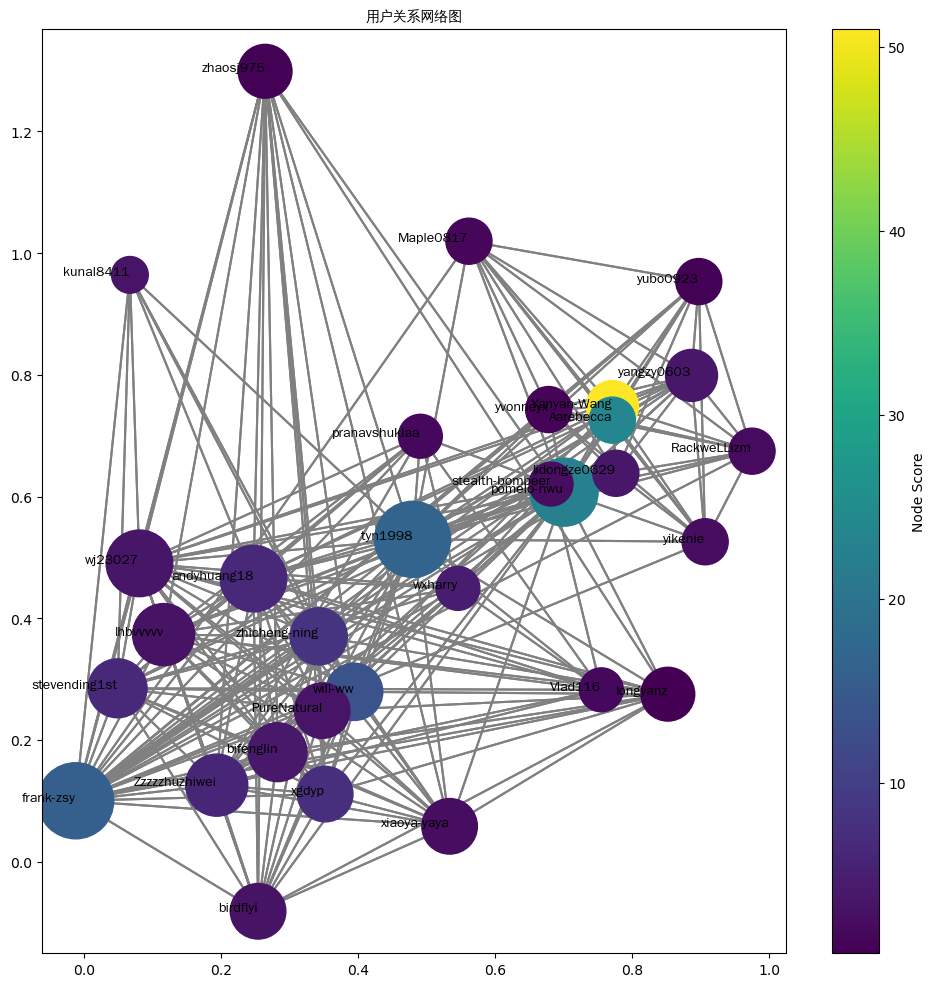

In [18]:
#4 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况;
# 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager

nodes = list(network.keys())
scores = [network[node]['score'] for node in nodes]
edges = [(user1, user2, weight) for user1, details in network.items() for user2, weight in details['friends']]

pos = {node: (np.random.rand(), np.random.rand()) for node in nodes}
for _ in range(10000):  # 调节节点位置使距离反映边的权重
    for user1, user2, weight in edges:
        x1, y1 = pos[user1]
        x2, y2 = pos[user2]
        
        current_distance = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        target_distance = 1 / weight 
        adjustment = (current_distance - target_distance) / current_distance * 0.1
        
        dx = (x2 - x1) * adjustment
        dy = (y2 - y1) * adjustment
        pos[user1] = (x1 + dx, y1 + dy)
        pos[user2] = (x2 - dx, y2 - dy)


degree_dict = {node: len(network[node]['friends']) for node in nodes}
colors = [network[node]['score'] for node in nodes]
sizes = [degree_dict[node] * 100 for node in nodes]
cmap = plt.cm.viridis 
norm = plt.Normalize(vmin=min(colors), vmax=max(colors))
font_path = '/usr/share/fonts/truetype/wqy/wqy-zenhei.ttc'  
my_font = font_manager.FontProperties(fname=font_path)

plt.figure(figsize=(12, 12))
plt.title("用户关系网络图", fontproperties=my_font)

scatter = plt.scatter([pos[node][0] for node in nodes],[pos[node][1] for node in nodes],
                      s=sizes, c=colors, cmap=cmap, norm=norm, zorder=2)
for user1, user2, weight in edges:
    x_values = [pos[user1][0], pos[user2][0]]
    y_values = [pos[user1][1], pos[user2][1]]
    plt.plot(x_values, y_values, 'gray', zorder=1)
for node in nodes:
    plt.text(pos[node][0], pos[node][1], node, fontsize=10, ha='right', fontproperties=my_font)

colorbar = plt.colorbar(scatter, label='Node Score')
plt.show()


节点大小越大，同时图中颜色越偏黄，附近点越密集的的用户在社交网络中最具有影响力。